<center>

# Geostatistical modeling - Assignment
</center>
<br>
<hr>
<font color=#ba4a00 >
  

<br>
    
Upload (one file upload per group is sufficient) your notebook to moodle following the naming convention:
<ul>
<li>``assignment_groupX.ipynb`` where X corresponds to your group number
</ul>
</font>


<br>
<font color= #a93226>
<br>
<center> Remember: copying code from someone else and pretending it is your own is serious scientific fraud!
</center>

<br><center> The assignment is due on: **Monday, 15th of September** 2025. Good luck!
</center>
<br>
</font>
<hr>

Before you submit this assignment, make sure everything runs as you expect it to.  
* **restart the kernel** (in the menubar, select Kernel -> Restart)
* **run all cells** (in the menubar, select Cell -> Run All)

Make sure to fill in any place that says 
```python
# YOUR CODE HERE
```
or 

YOUR ANSWER HERE

Delete lines that read 

```python
raise NotImplementedError()
```

when adding your solution.

In [206]:
#Enter your group number here: 8

In [207]:
# Some library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, cdist, squareform 
from scipy.spatial import distance_matrix
from scipy.optimize import curve_fit


We will work with a dataset stored in a CSV file with the name: `assignment_dataset.csv`. The dataset consists of six different columns:  

* `X` - x-coordinate of the data point in m 
* `Y` - y-coordinate of the data point in m 
* `facies_ID` - some facies ID of the data sample
* `porosity` - measured porosity value (from zero to one, where 1 = 100%) of the data sample  
* `permeability` - measured permeability (mD) of the data sample  
* `accoustic_impedance` - acoustic impedance (Pa·s/m$^3$) of the data sample

In the following cell, the dataset will be loaded. Make sure that it is in the same location as the assignment notebook to be able to load it:

In [208]:
data = pd.read_csv('assignment_dataset.csv') 

---
## Data assessment

Imagine the following scenario: You have the task to estimate a 2D porosity field within a certain area (let's assume the porosity values in the data are representative for a whole depth interval of the same geological unit).   

To achieve this, a colleague provided you with an older dataset of the region. With the data loaded, your first task is to assess the data for potential errors.

<div class="alert alert-block alert-info">
    
Your task: Create a subplot with three columns (so three subplots next to each other) and plot the histograms for _porosity, permeability, acoustic_impedance_. Remember to correctly label your axes and give each subplot a title.
</div>

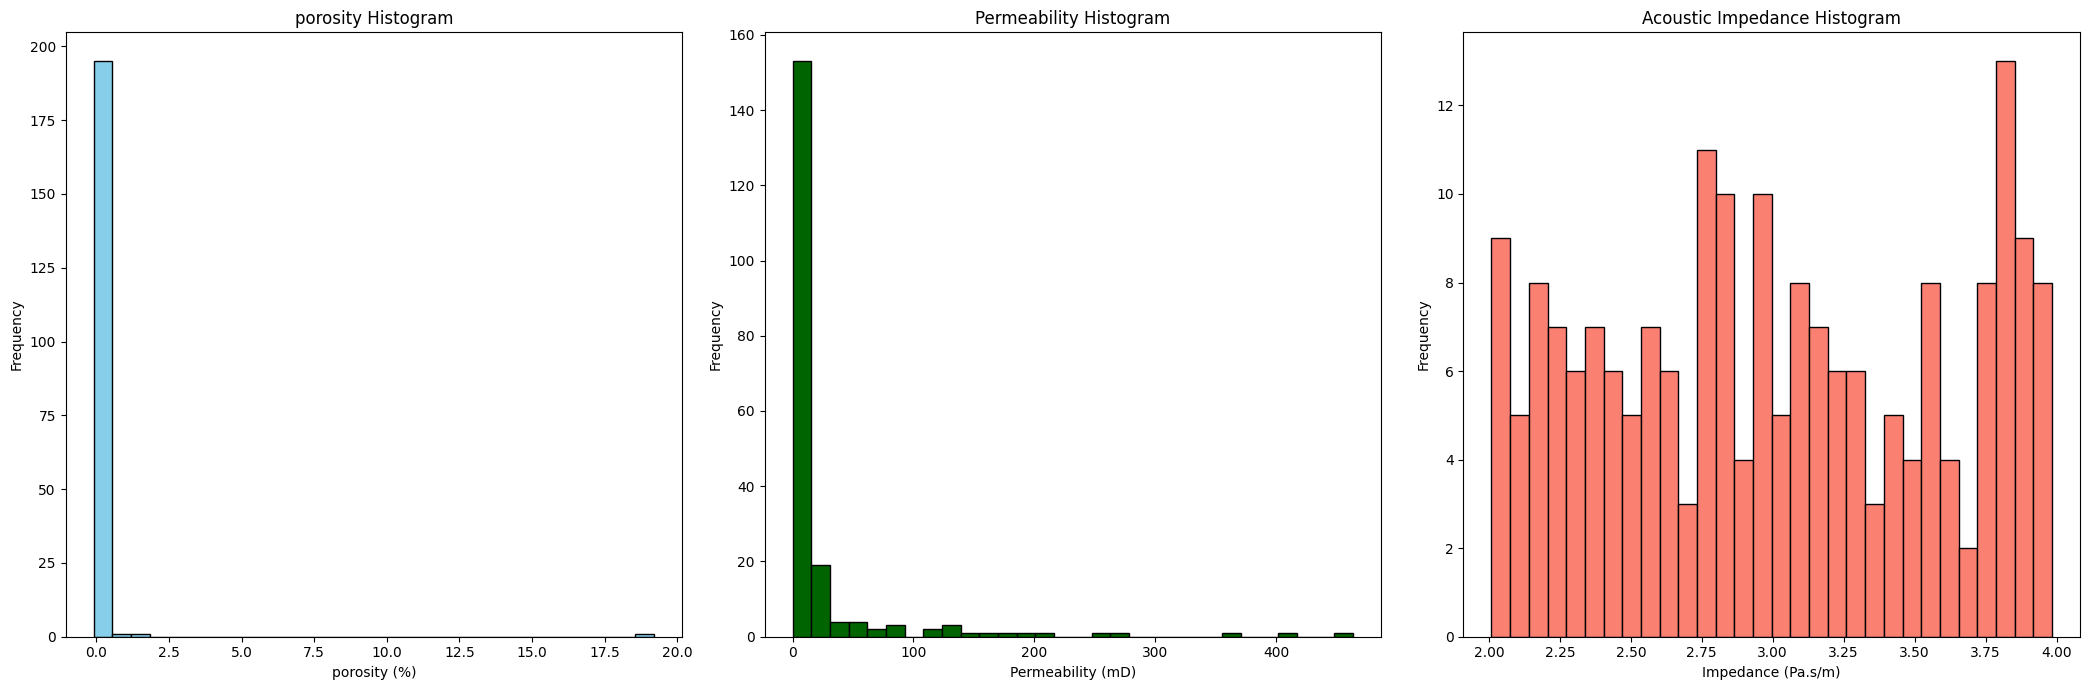

In [209]:
#YOUR CODE HERE
# Load dataset
data = pd.read_csv("assignment_dataset.csv")

# Create subplot with 3 columns
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

# --- Porosity Histogram ---
axs[0].hist(data['porosity'], bins=30, color='skyblue', edgecolor='black')
axs[0].set_title('porosity Histogram')
axs[0].set_xlabel('porosity (%)')
axs[0].set_ylabel('Frequency')

# --- Permeability Histogram ---
axs[1].hist(data['permeability'], bins=30, color='darkgreen', edgecolor='black')
axs[1].set_title('Permeability Histogram')
axs[1].set_xlabel('Permeability (mD)')
axs[1].set_ylabel('Frequency')

# --- Acoustic Impedance Histogram ---
axs[2].hist(data['acoustic_impedance'], bins=30, color='salmon', edgecolor='black')
axs[2].set_title('Acoustic Impedance Histogram')
axs[2].set_xlabel('Impedance (Pa.s/m)')
axs[2].set_ylabel('Frequency')

# Improve figure layout
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
Based on visual inspection, you might see that one of the parameters seems to have strange, i.e. errorneous data values. Which dataset parameter is it? And what leads you to this conclusion?
<div>

Porosity.Impossible negative values, high values exceeding 1. Porosity is a fraction between 0 and 1.

---
## Data cleaning

With the errorneous parameter identified, go ahead and clean the dataset that all _unreasonable_ values of said parameter (i.e. the rows where these values are in) are removed from the dataset.

<div class="alert alert-block alert-info">
Your task: Clean the dataset by removing all rows which have errorneous parameter values, and store that in a variable named with the same name `data`. So, overwrite the originally loaded data. Then complete the function `calc_sum` to calculate the sum of each parameter column (so porosity, permeability, acoustic_impedance) of the cleaned dataset, rounded to the 4th decimal position (hint: use _np.round()_).
<div>


In [210]:
# YOUR CODE HERE
# remove invalid porosity values (missing values, negative values and values greater than 1)
data=data[(data['porosity'].notna()) & (data['porosity'] >= 0) & (data['porosity'] <= 0.4)] 
# reset the dataset
data=data.reset_index(drop=True)
# Save the cleaned DataFrame to a new CSV (or overwrite the original)
data.to_csv("cleaned_data.csv", index=False)
# display cleaned dataset
data


,X,Y,facies_ID,porosity,permeability,acoustic_impedance
0,565,1485,1,0.11840,6.17000,2.009
1,2585,1185,1,0.15660,6.27500,2.864
2,2065,2865,2,0.19200,92.29700,3.524
3,3575,2655,1,0.16210,9.04800,2.157
4,1835,35,1,0.17660,7.12300,3.979
...,...,...,...,...,...,...
188,2475,785,1,0.16340,9.54200,2.945
189,3695,2325,1,0.15480,6.41200,2.298
190,375,1705,1,0.13210,2.40400,2.087
191,3795,535,1,0.06092,0.01582,3.907


<div class="alert alert-block alert-info">
Plot the histograms again as subplots and give your estimate of the underlying distributions for each parameter in the text cell below the code cell.
<div>

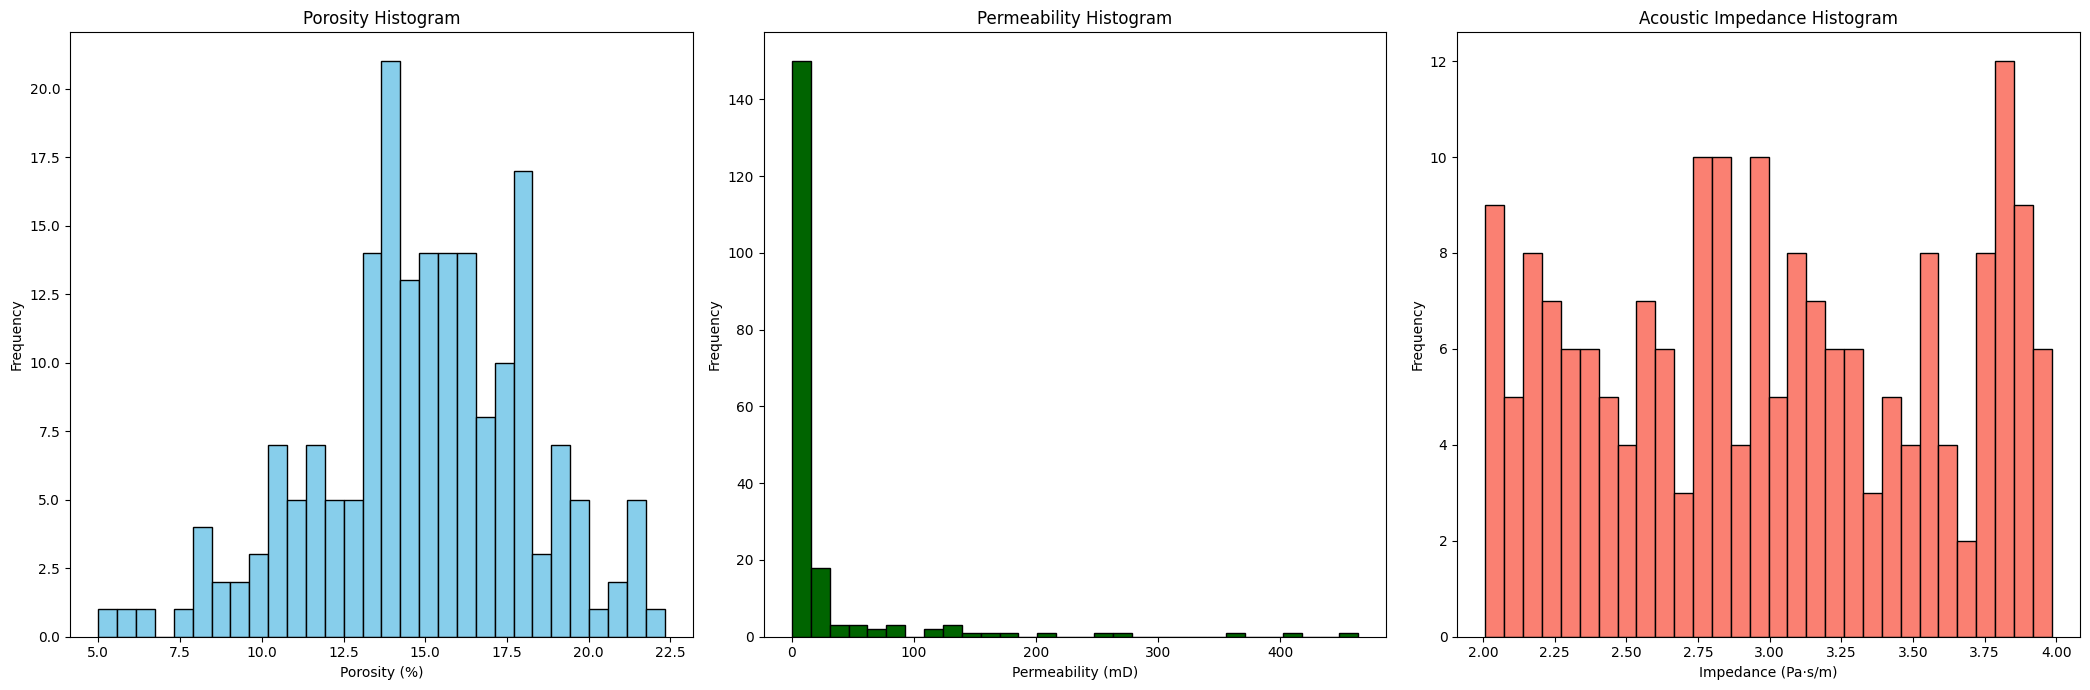

In [211]:
# YOUR CODE HERE

def plot_histograms(data):
    # Create subplot with 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(21, 7))
    # --- Porosity Histogram ---
    axs[0].hist(data['porosity']*100, bins=30, color='skyblue', edgecolor='black')
    axs[0].set_title('Porosity Histogram'); axs[0].set_xlabel('Porosity (%)'); axs[0].set_ylabel('Frequency')
    # --- Permeability Histogram ---
    axs[1].hist(data['permeability'], bins=30, color='darkgreen', edgecolor='black')
    axs[1].set_title('Permeability Histogram'); axs[1].set_xlabel('Permeability (mD)'); axs[1].set_ylabel('Frequency')
    # --- Acoustic Impedance Histogram ---
    axs[2].hist(data['acoustic_impedance'], bins=30, color='salmon', edgecolor='black')
    axs[2].set_title('Acoustic Impedance Histogram'); axs[2].set_xlabel('Impedance (Pa·s/m)'); axs[2].set_ylabel('Frequency')
    # Display everything nicely
    plt.tight_layout(); plt.show()

plot_histograms(data)



**Estimate of underlying distributions:**

- **Porosity:** Most values cluster between ~0.08–0.2(8%-20%) → roughly right-skewed / slightly normal, but bounded between 0 and 1(0 and 100%).  
- **Permeability:** Very wide range, heavy right tail → likely log-normal or highly skewed, with some extreme high values.  
- **Acoustic Impedance:** Values are mostly between 2–4 → roughly normal distribution.


## Correlation and Data analysis

From experience, we expect `porosity` and `permeability` to be correlated. This can be checked by calculating the correlation coefficient between two parameters. 

$$\rho_{x,y}=\frac{Cov_{x,y}}{\sigma_x \sigma_y}$$

with

$$Cov_{x,y}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{n}$$

<br>

<div class="alert alert-block alert-info">
Your task: Complete the function to calculate the corellation coefficient and round it to 4 decimal points. 
<div>

In [212]:
# YOUR CODE HERE
def calc_correlation(x, y):
    # Calculate the correlation coefficient between two parameters.
    # Ensure inputs are numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    # Calculate covariance
    cov_xy = np.mean((x - np.mean(x)) * (y - np.mean(y)))
    
    # Calculate standard deviations
    std_x = np.std(x)
    std_y = np.std(y)
    
    # Correlation coefficient
    corr = cov_xy / (std_x * std_y)
    
    # Round to 4 decimal places
    return np.round(corr, 4)

# Calculate correlation between porosity and permeability:
corr_por_perm = calc_correlation(data['porosity'], data['permeability'])
print("the correlation coefficient between porosity and permeability is", corr_por_perm)

    

the correlation coefficient between porosity and permeability is 0.5002


<div class="alert alert-block alert-info">
Your task: Calculate the correlation coefficient for the three parameters. Create also scatter plots of the three parameters as subplots and display the correlation coefficient in the respective plots.
<div>

Correlation (Porosity vs Permeability): 0.5002
Correlation (Porosity vs Acoustic Impedance): -0.2163
Correlation (Permeability vs Acoustic Impedance): -0.02


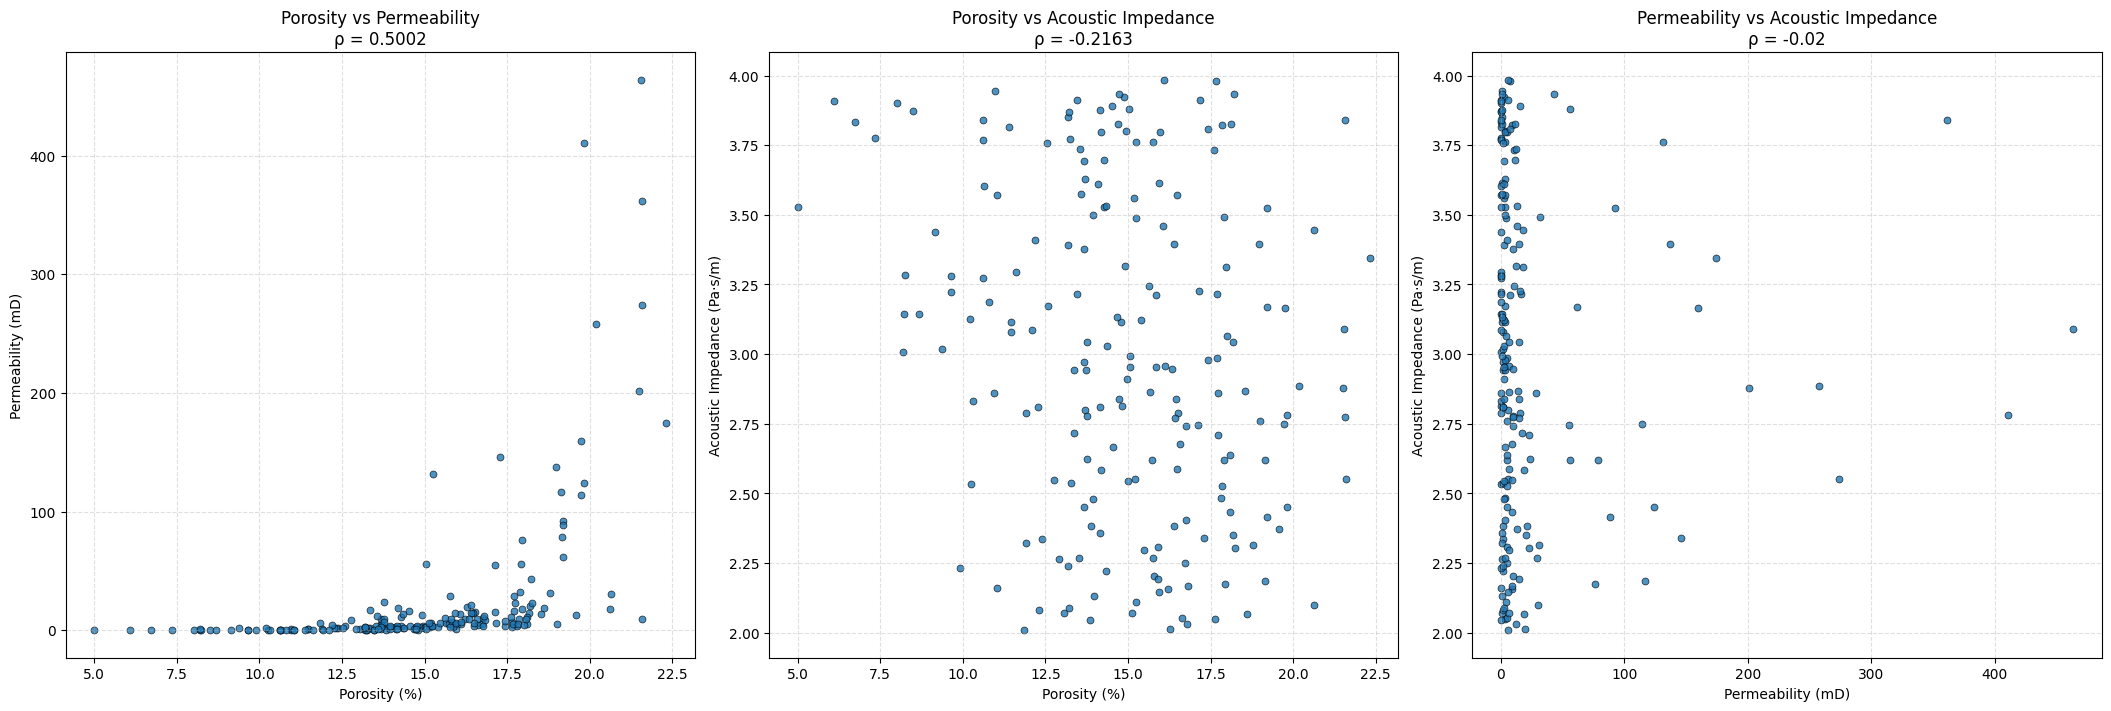

In [213]:
# YOUR CODE HERE

# --- Calculate correlation coefficients ---
corr_phi_k  = calc_correlation(data['porosity'],            data['permeability'])
corr_phi_ai = calc_correlation(data['porosity'],            data['acoustic_impedance'])
corr_k_ai   = calc_correlation(data['permeability'],        data['acoustic_impedance'])

print("Correlation (Porosity vs Permeability):", corr_phi_k)
print("Correlation (Porosity vs Acoustic Impedance):", corr_phi_ai)
print("Correlation (Permeability vs Acoustic Impedance):", corr_k_ai)

def plot_scatter_correlations(data, corr_phi_k, corr_phi_ai, corr_k_ai):
    fig, axs = plt.subplots(1, 3, figsize=(21, 7), constrained_layout=True)
    # 1) Porosity vs Permeability
    axs[0].scatter(data['porosity']*100, data['permeability'], s=25, alpha=0.8,
                   edgecolor='black', linewidths=0.5)
    axs[0].set_title(f"Porosity vs Permeability\nρ = {corr_phi_k}")
    axs[0].set_xlabel("Porosity (%)"); axs[0].set_ylabel("Permeability (mD)")
    axs[0].grid(True, linestyle='--', alpha=0.4)
    # 2) Porosity vs Acoustic Impedance
    axs[1].scatter(data['porosity']*100, data['acoustic_impedance'], s=25, alpha=0.8,
                   edgecolor='black', linewidths=0.5)
    axs[1].set_title(f"Porosity vs Acoustic Impedance\nρ = {corr_phi_ai}")
    axs[1].set_xlabel("Porosity (%)"); axs[1].set_ylabel("Acoustic Impedance (Pa·s/m)")
    axs[1].grid(True, linestyle='--', alpha=0.4)
    # 3) Permeability vs Acoustic Impedance
    axs[2].scatter(data['permeability'], data['acoustic_impedance'], s=25, alpha=0.8,
                   edgecolor='black', linewidths=0.5)
    axs[2].set_title(f"Permeability vs Acoustic Impedance\nρ = {corr_k_ai}")
    axs[2].set_xlabel("Permeability (mD)"); axs[2].set_ylabel("Acoustic Impedance (Pa·s/m)")
    axs[2].grid(True, linestyle='--', alpha=0.4)
    
    plt.show()

plot_scatter_correlations(data, corr_phi_k, corr_phi_ai, corr_k_ai)



 

## Conditional Data analysis

In the dataset, there is a column `facies_ID`. Until now, you had a look at the whole dataset. In this task, you are asked to look at subsets of the data, divided by the `facies_ID`.

<br>

<div class="alert alert-block alert-info">
Your task: Write the function `find_subsets(data)` to find out, how many unique facies ID there are, and then let the function return a dictionary with the subsets of the dataframe. 
    
To re-iterate: This function should return a [dictionary](https://docs.python.org/3/tutorial/datastructures.html#dictionaries) `facies_dict`, where each pair in the dictionary is: 'faciesX' : sub-dataframe. So, each `key` (left of the : in a dictionary) is a string with the respective facies ID, and each `value` (right of the : in a dictionary) is the dataframe of a subset of our original dataframe `data`. 
For more information about dictionaries, look [here](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)
<div>

In [ ]:
# YOUR CODE HERE
#Return a dictionary of subsets of the dataframe by facies_ID.
def find_subsets(data):
    facies_dict = {}
    for fid in data['facies_ID'].unique():
        facies_dict[f"facies{fid}"] = data[data['facies_ID'] == fid].copy()
    return facies_dict

# Find subsets by facies_ID
subsets = find_subsets(data)
print(f"Number of unique facies IDs: {len(subsets)}")
for key, subset in subsets.items():
    print(f"{key}: {len(subset)} rows")


Number of unique facies IDs: 2
facies1: 130 rows
facies2: 63 rows


<div class="alert alert-block alert-info">
Your task: Compare the sub-datasets which are the outputs of your `find_subsets(data)` function. How do the means of `porosity` `permeability` and `acoustic_impedance` compare? Is there something striking?
    
Plot Boxplots of the parameters as - again - three subplots, i.e. one subplot for each parameter, and in each subplots the boxplots for the sub-datasets.  
<div>

Porosity: facies2 > facies1.

Permeability: facies2 ≫ facies1 — most striking difference.

Acoustic Impedance: slightly higher in facies2.

Means of parameters for each facies:

         porosity  permeability  acoustic_impedance
facies1     0.142        14.106               2.993
facies2     0.165        46.067               3.005


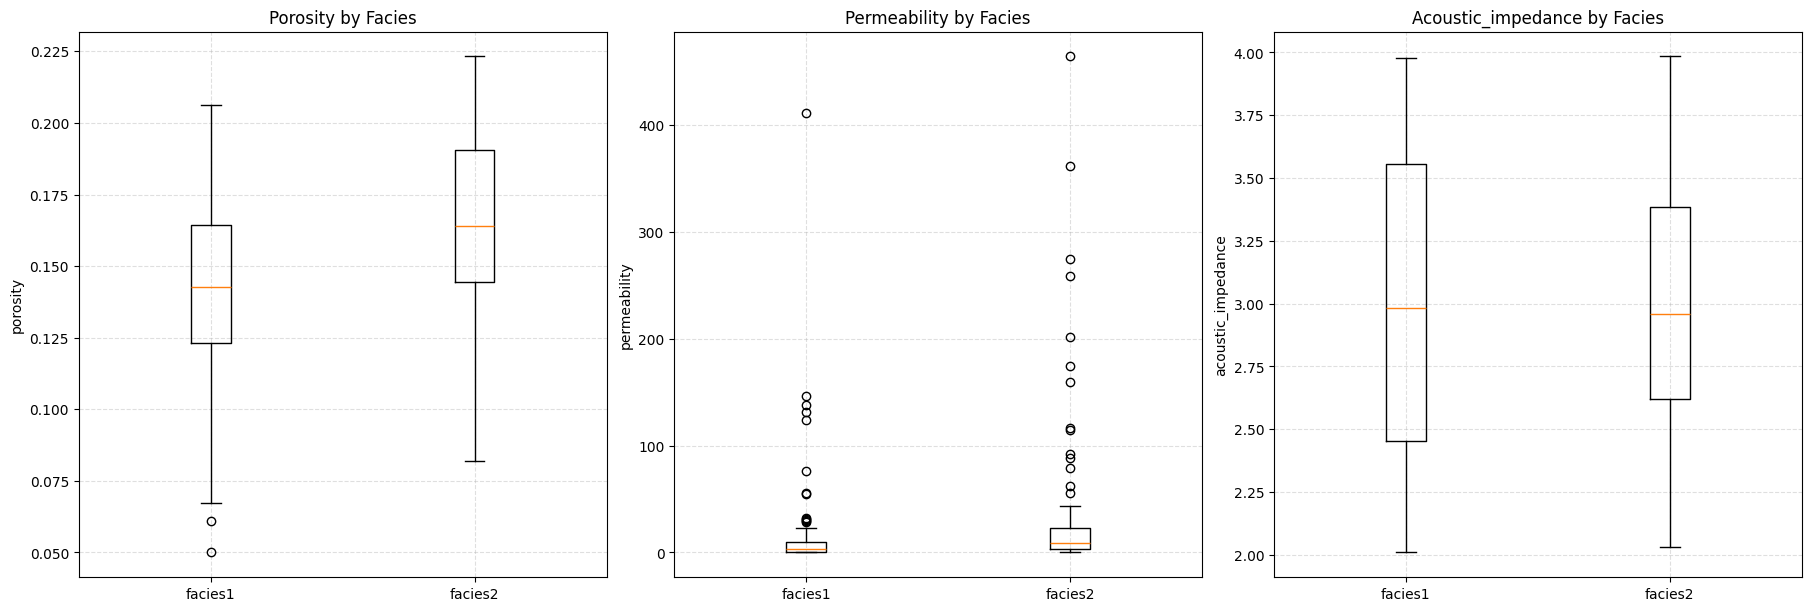

In [ ]:
# YOUR CODE HERE
# --- Compare means of the parameters for each facies ---
means = {key: subset[['porosity', 'permeability', 'acoustic_impedance']].mean() 
         for key, subset in subsets.items()}

means_df = pd.DataFrame(means).T.round(3)  # Convert to DataFrame and round
print("Means of parameters for each facies:\n")
print(means_df)

# --- Create boxplots for each parameter ---
fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

parameters = ['porosity', 'permeability', 'acoustic_impedance']

for i, param in enumerate(parameters):
    data_to_plot = [subset[param] for subset in subsets.values()]
    axs[i].boxplot(data_to_plot, tick_labels=list(subsets.keys()))  # Use tick_labels
    axs[i].set_title(f"{param.capitalize()} by Facies")
    axs[i].set_ylabel(param)
    axs[i].grid(True, linestyle='--', alpha=0.4)

plt.show()


<div class="alert alert-block alert-info">
Your task:You might find a difference in one parameter between the sub-datasets. Now, for a final plot, create a spatial scatter plot of the whole dataset. Color the points by `facies_ID` and scale their size by `permeability`.
What can you see deduce from this visualization? Again, write your answers below your plot code cell.
<div>

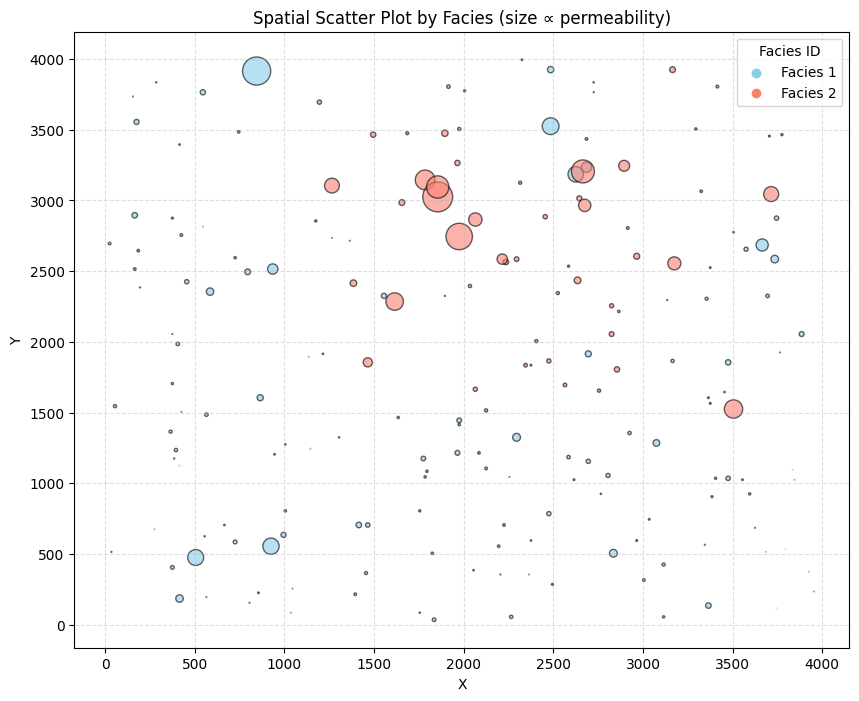

In [216]:
# YOUR CODE HERE
# Define colors for facies
colors = {1: 'skyblue', 2: 'salmon'}

plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    data['X'], data['Y'],
    c=data['facies_ID'].map(colors),
    s=data['permeability'],  # scale size by permeability
    alpha=0.6,
    edgecolor='black'
)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Spatial Scatter Plot by Facies (size ∝ permeability)")
plt.grid(True, linestyle='--', alpha=0.4)

# Create a legend
for facies, color in colors.items():
    plt.scatter([], [], c=color, label=f"Facies {facies}")
plt.legend(title="Facies ID")

plt.show()


The spatial scatter plot shows that facies are not randomly distributed but form spatial clusters, indicating distinct geological environments. Marker size, representing permeability, reveals that some facies (e.g., Facies2) consistently exhibit higher permeability. This confirms that permeability is strongly facies-controlled, with certain rock types providing better flow pathways. Overall, both facies distribution and permeability are spatially structured, highlighting the importance of considering facies when predicting reservoir performance and fluid flow.

## Data visualization

The task now is to estimate a 2D porosity field within a certain area, defined by the extent of X and Y in the dataset (make sure that you use cleaned (removal of errorneous data as described above) data to work on this and all subsequent tasks).  

<br>
<div class="alert alert-block alert-info">    
Your task: Create a scatterplot to visualize the data. The points should be colored by `facies_ID` and the size of the points should reflect the measured `porosity` in percent! Remember to correctly label your axes and give each subplot a title.
<div>

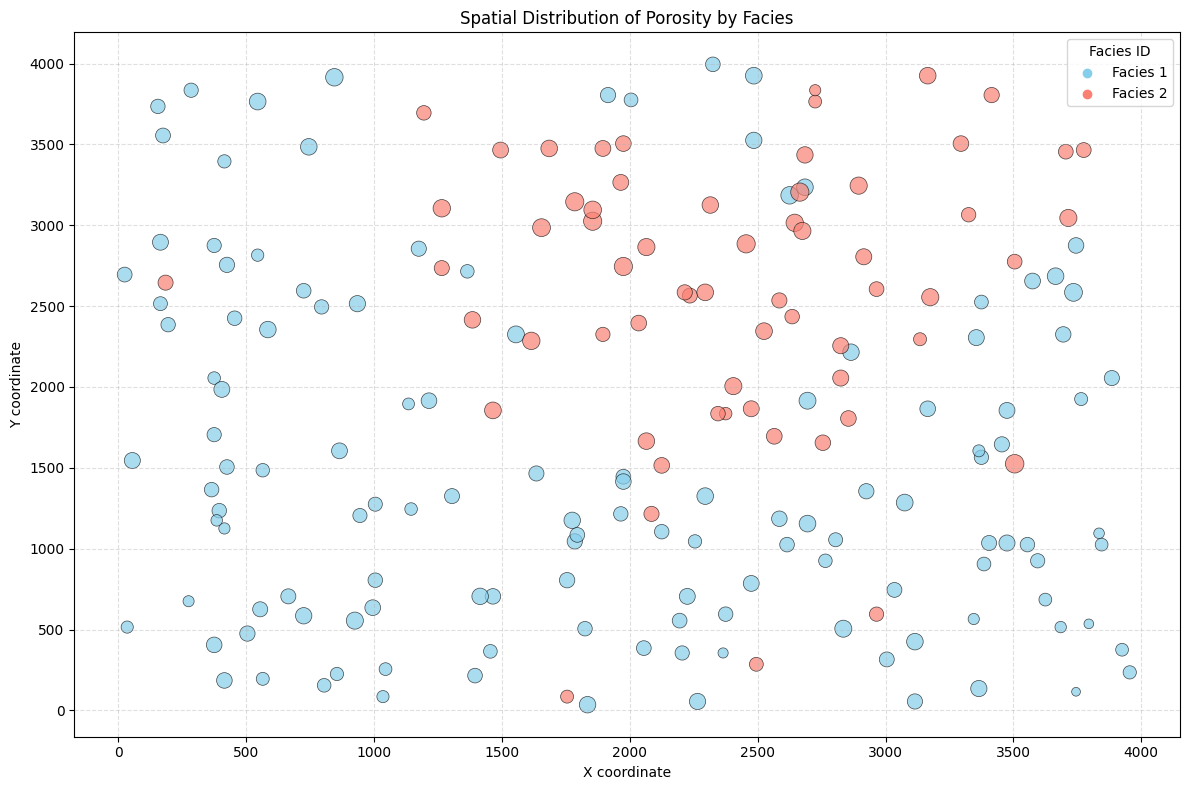

In [217]:

# YOUR CODE HERE
# Use cleaned data
plot_df = data[['X', 'Y', 'facies_ID', 'porosity']].copy()

# Scale marker size by porosity
size_factor = 800
sizes = plot_df['porosity'] * size_factor

# Define colors for the 2 facies
colors = plot_df['facies_ID'].map({1: 'skyblue', 2: 'salmon'})

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(
    plot_df['X'], plot_df['Y'],
    c=colors,
    s=sizes,
    alpha=0.7,
    edgecolors='k',
    linewidth=0.5
)

plt.title('Spatial Distribution of Porosity by Facies')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.grid(True, linestyle='--', alpha=0.4)

# Create a simple legend for facies
for facies_id, color in zip([1, 2], ['skyblue', 'salmon']):
    plt.scatter([], [], c=color, label=f'Facies {facies_id}')
plt.legend(title='Facies ID')

plt.tight_layout()
plt.show()



---
## Variogram determination

We now use the sampled points to determin the `sill` (variance) and `range` (correlation length) of an experimental variogram or our **porosity**. To achieve this, perform the following steps:

1. Determine an experimental variogram on the basis of the set of sampled points. Remember the approach of a "variogram cloud" from the exercise. Different to the exercise, we are looking at 2D data here. Some tips:  
    * There are several methods in packages to calculate distances. We loaded in different ones like `pdist` or `cdist` from `scipy.spatial.distance` or the method `distance_matrix` from `scipy_spatial`. These can be used, but for loops to calculate the distance matrix are also valid.  
    * Choose a valid bin bin width for averaging the variogram cloud.
    * The highest lag should be at most half of the domain length (so around 2.5 km).  
2. Fit a theoretical (exponential) variogram model to your experimental variogram. Like in the exercise, you may use the  `curvefit` method from `scipy.optimize`.
3. Your theoretical variogram should be properly defined as a _user-defined function_ for later use in a kriging task.

<br>
<div class="alert alert-block alert-info">    

Your task - step 1.1: complete the function to calculate the distance matrix and semivariance matrix similarly to the exercise and plot the variogram cloud.
<div>
    

In [218]:
# YOUR CODE HERE
# Function to compute distance matrix and semivariance for 2D points
def variogram_cloud_general(X, Y, values, parameter=None):
    """
    Compute pairwise distances and semivariances.
    If parameter='permeability', use log-transform.
    """
    coords = np.column_stack((X, Y))
    
    # Log-transform permeability
    if parameter == 'permeability':
        values = np.log(values)
    
    distances = pdist(coords, metric='euclidean')
    values_diff = pdist(values.reshape(-1,1), metric='sqeuclidean')
    semivariance = 0.5 * values_diff
    
    return distances, semivariance


Call the function and plot the returned matrices as the variogram cloud in the next cell:

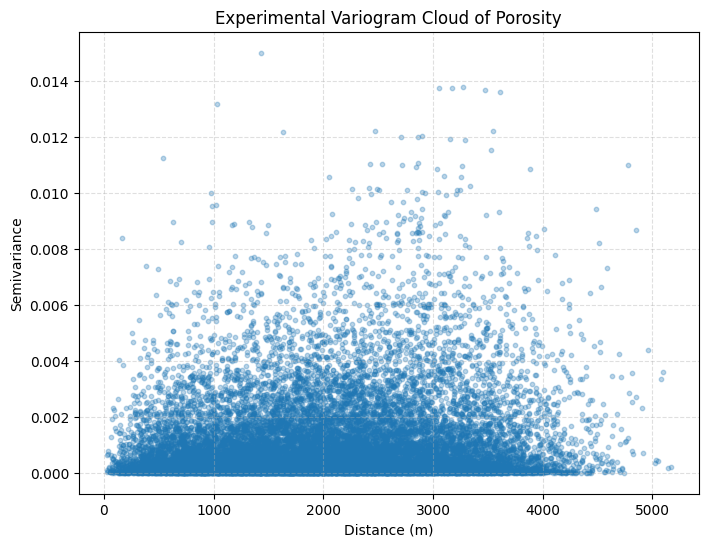

In [219]:
# YOUR CODE HERE

# Extract coordinates and porosity, compute variogram cloud, and plot semivariance vs distance
X = data['X'].values
Y = data['Y'].values
porosity = data['porosity'].values

# Compute variogram cloud
distances, semivariance = variogram_cloud(X, Y, porosity)

# Plot semivariance vs distance
plt.figure(figsize=(8,6))
plt.scatter(distances, semivariance, alpha=0.3, s=10)
plt.xlabel('Distance (m)')
plt.ylabel('Semivariance')
plt.title('Experimental Variogram Cloud of Porosity')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()


<div class="alert alert-block alert-info">  
Your task - step 1.2: With flattened arrays for distance matrix and semivariance calculate the averaged semivariance values of the variogram. Store the bin centers and the averaged semivariance values in respective arrays (or lists). Choose a suited `stop` value as the max. lag distance and 0 as `start` lag distance!
    
Plot your calculated average values as a semivariogram to see, if your chosen lag size is reasonable, i.e. the variogram is neither overly smoothed (too large lag size) nor too noisy (too small lag size). 
<div>

Using h_max = 4305.197117696497


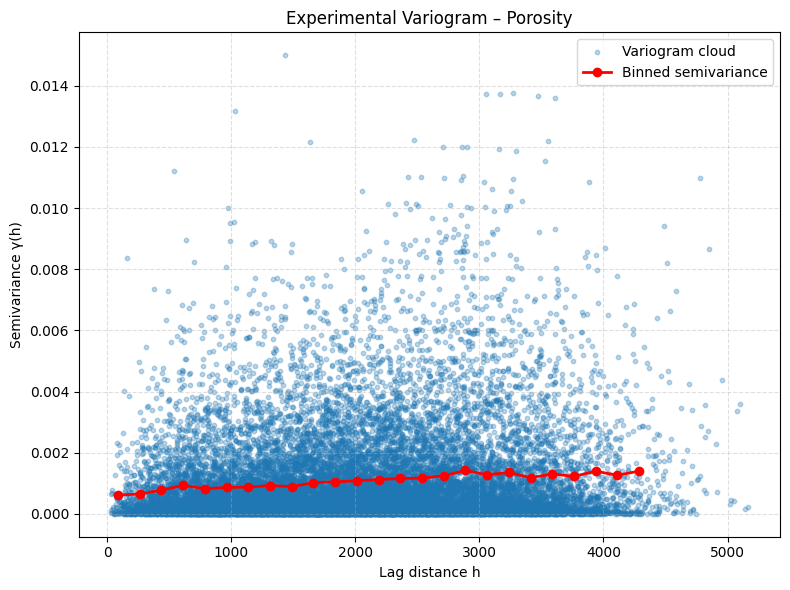

In [220]:
# --- Define bins and compute binned semivariance ---
def binned_variogram(distances, semivariance, bin_width=100, h_max=None):
    if h_max is None:
        h_max = distances.max()/1.2
    print(f"Using h_max = {h_max}")
    bins = np.arange(0, h_max + bin_width, bin_width)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    gamma = []

    for i in range(len(bins)-1):
        mask = (distances >= bins[i]) & (distances < bins[i+1])
        if np.any(mask):
            gamma.append(np.mean(semivariance[mask]))
        else:
            gamma.append(np.nan)
    
    return bin_centers, np.array(gamma)

# --- Compute binned semivariance ---
bin_width = 175  # adjust based on point spacing
bin_centers, gamma = binned_variogram(distances, semivariance, bin_width=bin_width)

# --- Plot experimental variogram ---
plt.figure(figsize=(8,6))
plt.scatter(distances, semivariance, alpha=0.3, s=10, label='Variogram cloud')
plt.plot(bin_centers, gamma, 'ro-', linewidth=2, label='Binned semivariance')
plt.xlabel('Lag distance h')
plt.ylabel('Semivariance γ(h)')
plt.title('Experimental Variogram – Porosity')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">  
Your task - step 2.1: complete the function for an exponential variogram below. Then use `curve_fit` to determine the the values for range `r` and sill `s`. For a function parameter `p0` in `curve_fit` use [35, 2500], as the minimum lag distance may be somewhat around 35 m.
<div>

In [ ]:
# YOUR CODE HERE
# --- Define exponential variogram function ---
def exponential_variogram(h, s, r):
    #Exponential variogram model: γ(h) = s * (1 - exp(-h / r))
    return s * (1 - np.exp(-h / r))

In [222]:
# YOUR CODE HERE
# --- Use binned semivariance for fitting ---
# bin_centers and gamma from previous binned variogram
# remove NaNs for fitting
mask = ~np.isnan(gamma)
h_fit = bin_centers[mask]
gamma_fit = gamma[mask]

# --- Fit exponential model using curve_fit ---
popt, pcov = curve_fit(exponential_variogram, h_fit, gamma_fit, p0=[35, 2500])
sill, range_ = popt

print(f"Fitted sill: {sill:.3f}, Fitted range: {range_:.1f} m")


Fitted sill: 0.001, Fitted range: 657.5 m


<div class="alert alert-block alert-info">  
Your task - step 2.2: Plot the theoretical variogram and your experimental variogram together in the same plot. Let the numerical values for `r` and `s` be written in the plot (reasonably rounded!).
<div>

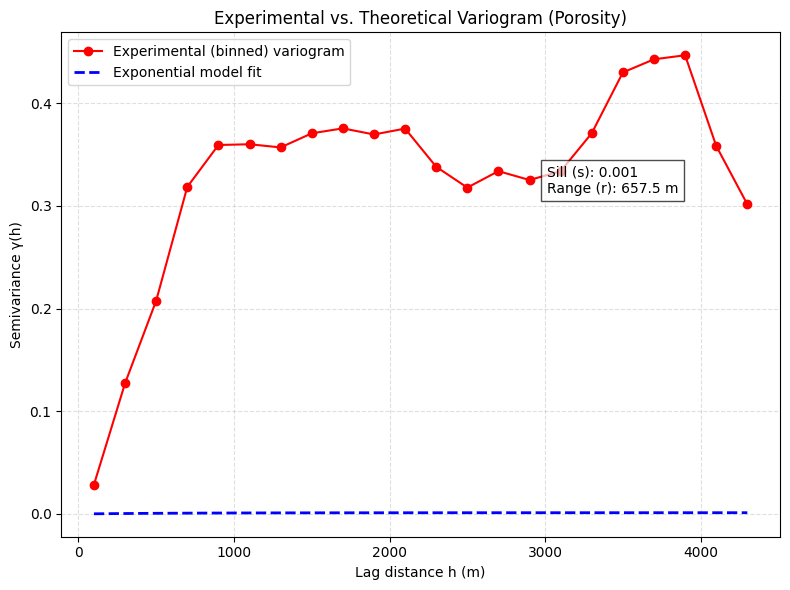

In [ ]:
# YOUR CODE HERE
# --- Plot experimental and fitted variogram ---
plt.figure(figsize=(8,6))

# Experimental (binned) variogram
plt.plot(bin_centers, gamma, 'ro-', label='Experimental (binned) variogram')

# Fitted theoretical variogram
plt.plot(bin_centers, exponential_variogram(bin_centers, sill, range_), 'b--', linewidth=2, label='Exponential model fit')

# Labels and title
plt.xlabel('Lag distance h (m)')
plt.ylabel('Semivariance γ(h)')
plt.title('Experimental vs. Theoretical Variogram (Porosity)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()

# Annotate fitted parameters directly on the plot
text = f"Sill (s): {sill:.3f}\nRange (r): {range_:.1f} m"
plt.text(0.7 * bin_centers.max(), 0.7 * np.nanmax(gamma), text,
         fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.tight_layout()
plt.show()


---
## Ordinary Kriging

With the variogram analysis, you now have everything to perform a kriging exercise on the dataset, i.e. create a kriged parameter map (what we originally wanted). 
In the exercise, we performed simple kriging on a 1D well-log. Now, we'll use ordinary kriging, which is rather similar. Different to the simple kriging, we use here range and sill, i.e. the variogram function directly instead of the covariance function. 

We provided the function `ordinary_kriging` for you to use. Some points to this function:
* It uses `r` as range and `s` as sill from your `curve_fit`.
* The input `a` is a distance matrix as you created for the variogram cloud (so you can use that!)
* `b` is the distance vector between our data and the target point.
* Many steps in this function are similar to simple kriging, but there is a section called "weight correction", which is a bit more advanced. It ensures that all weights are positive. If interested, here's the reference:_Clayton V. Deutsch, Correcting for negative weights in ordinary kriging, Computers and Geosciences, Volume 22, Issue 7, 1996, Pages 765-773_

In [224]:
def ordinary_kriging(a, b, prop, r, s):
    """Kriging for single location
    
    **Arguments**:
        - a (np.array) = distance between input data points (n x n)
        - b (np.array) = distance vetor between target and input data points (n)
        - prop (np.array) = values of input data (n)
        - r (float) = range parameter of variogram model
        - s (float) = sill parameter of variogram model
        
    **Returns**:
        - result (float) = calculated kriging result
        - pred_var (float) = calculated kriging variance
        - w (np.array) = calculated kriging weights
    """
    #Creating empty matrices
    shape = len(a)
    C = np.zeros((shape + 1, shape + 1))
    c = np.zeros((shape + 1))
    w = np.zeros((shape + 1))

    #filling Matrices based distance matrices and model for spatial correlation
    C[:shape, :shape] = exponential_variogram(a, r, s)
    c[:shape] = exponential_variogram(b, r, s)
    
    np.fill_diagonal(C,0)

    #Fill additional matrix entries, specifically for OK
    C[shape, :] = 1.0
    C[:, shape] = 1.0
    C[shape, shape] = 0.0
    c[shape] = 1.0

    #Solve Kriging equations for weights
    w = np.linalg.solve(C,c)

    #Section: weight correction following Deutsch (1996)
    # 1. Negative Weights to zero
    w[w<0] = 0

    # 2. correct screening effect
    average_magnitude_of_negative_weights = np.mean(w[w>0])
    average_covariance_of_negative_weights = np.mean(c[w>0])
    mask = (w>0) & (c<average_covariance_of_negative_weights) & (w<average_magnitude_of_negative_weights)
    w[mask]=0

    # 3. restandardize to one
    w = w/np.sum(w)
    #End Section: weight correction following Deutsch (1996)

    #Calculating estimate abd variance for kriging
    pred_var = w[shape] + np.sum(w[:shape] * c[:shape])
    result = np.dot(prop, w[:shape])

    return result, pred_var, w

Based on the code above, perform the following tasks:

  
Task 3.1: Define an empty grid `xy` (_hint_ `xy = np.meshgrid(some input)`) with the extent of the domain (4000 m $\times$ 4000 m) with each grid point around 80 m apart.


In [225]:
# YOUR CODE HERE
# Define grid boundaries (in meters)
x_min, x_max = 0, 4000
y_min, y_max = 0, 4000

# Define spacing between grid points
grid_spacing = 80  # meters

# Generate coordinate vectors
x_points = np.arange(x_min, x_max + grid_spacing, grid_spacing)
y_points = np.arange(y_min, y_max + grid_spacing, grid_spacing)

# Create a 2D grid (mesh)
X_grid, Y_grid = np.meshgrid(x_points, y_points)

print(f"Grid shape: {X_grid.shape} (rows × columns)")
print(f"Total grid points: {X_grid.size}")

Grid shape: (51, 51) (rows × columns)
Total grid points: 2601


<div class="alert alert-block alert-info">  
Your task: Determine the interpolation value for each grid position using the provided ordinary kriging function.
<div>

In [226]:
# YOUR CODE HERE
# Convert grid into coordinate pairs
grid_points = np.column_stack((X_grid.ravel(), Y_grid.ravel()))

# Extract known data points and values
data_points = np.column_stack((X, Y))   # from your dataset
prop_values = porosity                  # the variable to interpolate

# Compute distance matrix (data-to-data)
dist_matrix = cdist(data_points, data_points)

# Prepare empty arrays for results
kriged_values = np.zeros(len(grid_points))
kriging_variances = np.zeros(len(grid_points))

# Loop through each grid point and perform kriging
for i, (xg, yg) in enumerate(grid_points):
    # Distance between grid point and data points
    dist_vector = np.sqrt((X - xg)**2 + (Y - yg)**2)
    
    # Apply ordinary kriging for this location
    z, var, w = ordinary_kriging(dist_matrix, dist_vector, prop_values, range_, sill)
    
    kriged_values[i] = z
    kriging_variances[i] = var

# Reshape back to grid
Z_kriged = kriged_values.reshape(X_grid.shape)
Var_kriged = kriging_variances.reshape(X_grid.shape)


<div class="alert alert-block alert-info">  
Your task: Plot the resulting kriging map. Label your plot elements, add a colorbar.
    <div>  

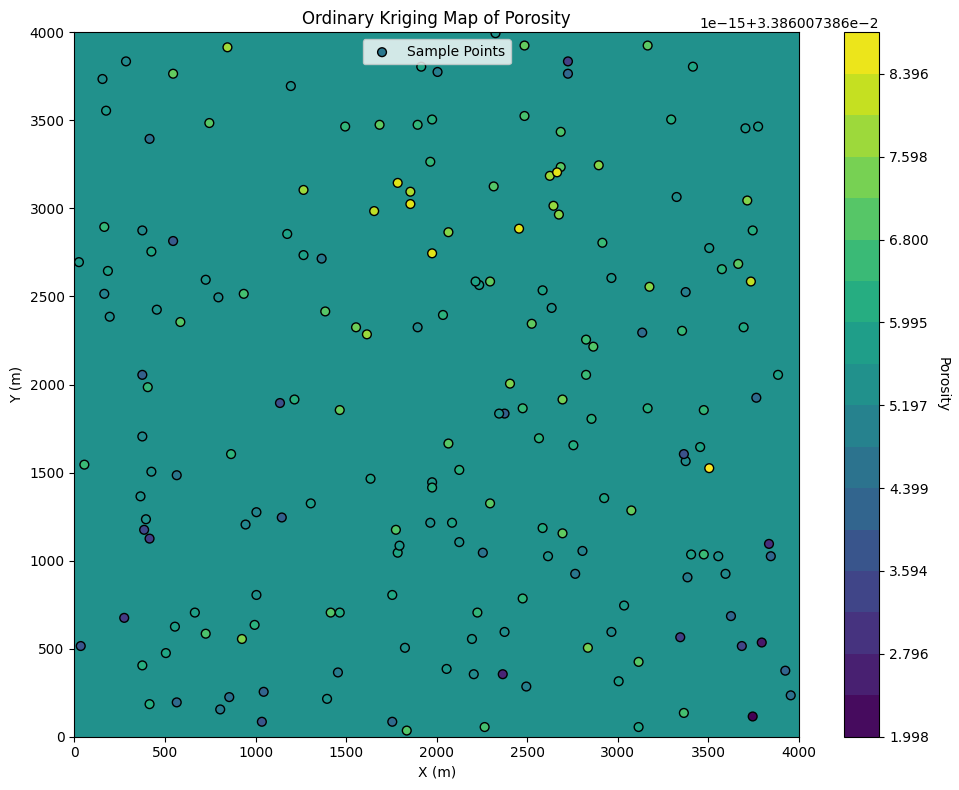

In [227]:
# YOUR CODE HERE
# --- Plot the Kriged Porosity Map ---
plt.figure(figsize=(10,8))

# Contour-filled plot of kriged porosity
contour = plt.contourf(X_grid, Y_grid, Z_kriged, levels=20, cmap='viridis')

# Overlay the original data points
plt.scatter(X, Y, c=porosity, edgecolor='k', cmap='viridis', s=40, label='Sample Points')

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Porosity', rotation=270, labelpad=15)

# Labels and title
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Ordinary Kriging Map of Porosity')
plt.legend()
plt.grid(False)
plt.tight_layout()
plt.show()


---
## Kriging of other parameters

Here, we want to generate kriging maps of the other parameters, `facies_ID`, `acoustic_impedance` and `permeability`. The ranges and sills for the other parameters were provided by a colleague (Remember that permeability is log-normal distributed, so for a variogram analysis, you should use the logarithm of permeability.

<br>

<div class="alert alert-block alert-info">  
Your task: Generalize the function for the variogram cloud, that if 'permeability' is provided as the `parameter` keyword, the logarithm of permeability (np.log) gets used to calculate the variogram cloud.

Then calculate the experimental variograms for facies_ID, permeability and acoustic impedance and plot them as subplots.
<div>

Using h_max = 4305.197117696497
Using h_max = 4305.197117696497
Using h_max = 4305.197117696497


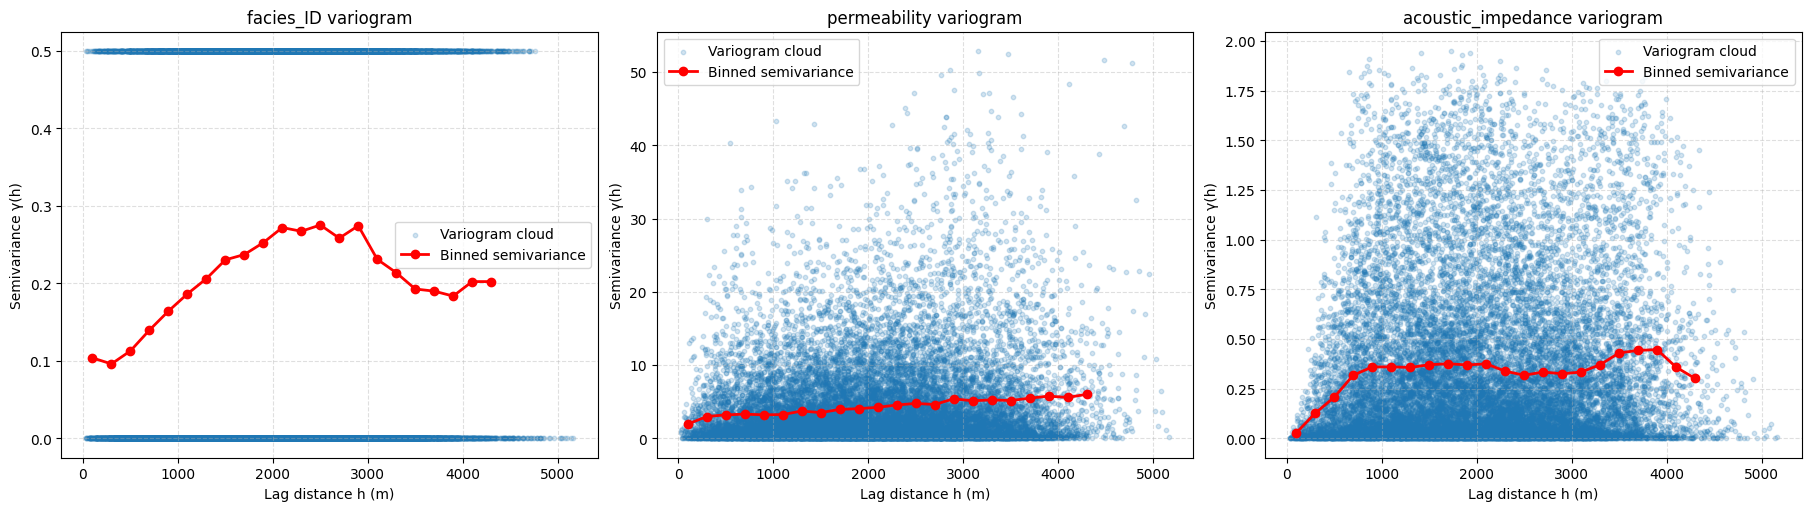

In [ ]:
# YOUR CODE HERE
# --- Parameters to analyze ---
parameters = ['facies_ID', 'permeability', 'acoustic_impedance']

# --- Create subplots ---
fig, axs = plt.subplots(1, 3, figsize=(18, 5), constrained_layout=True)

for i, param in enumerate(parameters):
    values = data[param].values
    # use log-transform only for permeability
    distances, semivariance = variogram_cloud_general(
        data['X'].values, data['Y'].values, values, parameter=param if param=='permeability' else None
    )
    h_max = distances.max() / 1.2 # adjust as needed
    # Optional: binning for smoother variogram
    bin_width = 200 # adjust as needed
    bin_centers, gamma = binned_variogram(distances, semivariance, bin_width=bin_width, h_max=h_max)
    
    # Plot
    axs[i].scatter(distances, semivariance, alpha=0.2, s=10, label='Variogram cloud')
    axs[i].plot(bin_centers, gamma, 'r-o', linewidth=2, label='Binned semivariance')
    axs[i].set_title(f'{param} variogram')
    axs[i].set_xlabel('Lag distance h (m)')
    axs[i].set_ylabel('Semivariance γ(h)')
    axs[i].grid(True, linestyle='--', alpha=0.4)
    axs[i].legend()

plt.show()
    

<div class="alert alert-block alert-info">  
Your task: Perform the ordinary kriging for the logarithm of permeability and acoustic impedance, and plot the two maps as subplots. You do not need colorbars now.
    
Use the following `r` and `s` for the parameters (or calculate them yourselves with `curve_fit`:

`permeability` r = 817.42, s=3.95  
`impedance` r = 1493, s=0.38
<div>

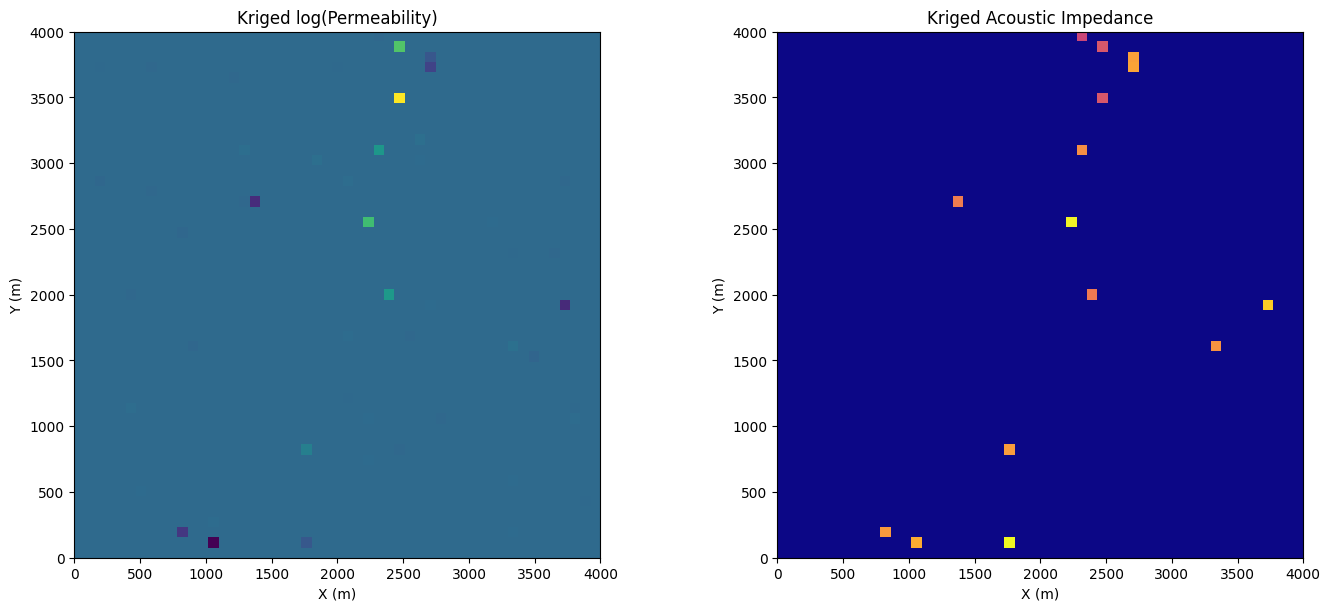

In [229]:
# YOUR CODE HERE
# --- Grid definition (reuse the previous grid) ---
x_grid = np.arange(0, 4000+1, 80)
y_grid = np.arange(0, 4000+1, 80)
Xg, Yg = np.meshgrid(x_grid, y_grid)

# Flatten grid for easier kriging
grid_points = np.column_stack([Xg.ravel(), Yg.ravel()])

# --- Distance matrix for input points ---
coords = data[['X','Y']].values
dist_matrix = squareform(pdist(coords, metric='euclidean'))

# --- Ordinary Kriging for log(permeability) ---
log_perm = np.log(data['permeability'].values)
r_perm, s_perm = 817.42, 3.95

kriged_perm = np.zeros(grid_points.shape[0])
for i, gp in enumerate(grid_points):
    d_vec = np.linalg.norm(coords - gp, axis=1)
    kriged_perm[i], _, _ = ordinary_kriging(dist_matrix, d_vec, log_perm, r_perm, s_perm)

# Reshape back to grid
kriged_perm_map = kriged_perm.reshape(Xg.shape)

# --- Ordinary Kriging for acoustic impedance ---
impedance = data['acoustic_impedance'].values
r_imp, s_imp = 1493, 0.38

kriged_imp = np.zeros(grid_points.shape[0])
for i, gp in enumerate(grid_points):
    d_vec = np.linalg.norm(coords - gp, axis=1)
    kriged_imp[i], _, _ = ordinary_kriging(dist_matrix, d_vec, impedance, r_imp, s_imp)

# Reshape back to grid
kriged_imp_map = kriged_imp.reshape(Xg.shape)

# --- Plot results ---
fig, axs = plt.subplots(1, 2, figsize=(14,6), constrained_layout=True)

im0 = axs[0].imshow(kriged_perm_map, extent=[0,4000,0,4000], origin='lower', cmap='viridis')
axs[0].set_title('Kriged log(Permeability)')
axs[0].set_xlabel('X (m)')
axs[0].set_ylabel('Y (m)')

im1 = axs[1].imshow(kriged_imp_map, extent=[0,4000,0,4000], origin='lower', cmap='plasma')
axs[1].set_title('Kriged Acoustic Impedance')
axs[1].set_xlabel('X (m)')
axs[1].set_ylabel('Y (m)')

plt.show()

---
## Kriging and variance

Above, you not only computed the kriging estimate for porosity but also kriging variance. Take a look at the kriging variance map for porosity and compare the variance with the locations of the original porosity measurement data. 

<br>

<div class="alert alert-block alert-info">  
Your task: Plot the kriging variance map for porosity together with a scatter plot of the original porosity measurement locations. 
<div>

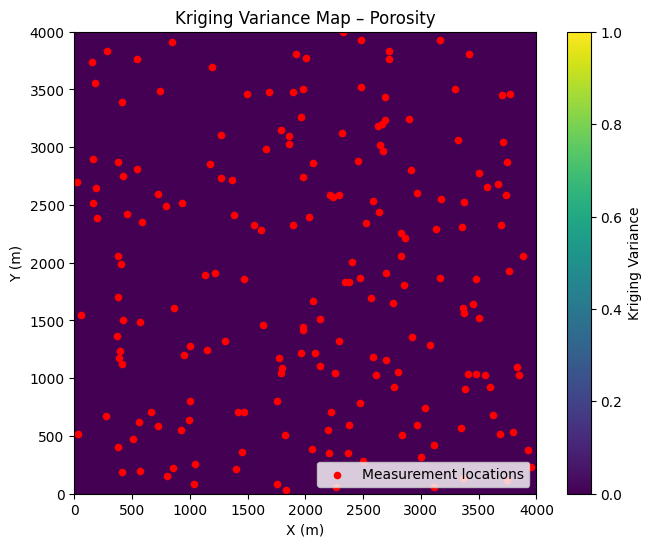

In [232]:
# YOUR CODE HERE
# --- Grid definition (reuse previous grid) ---
x_grid = np.arange(0, 4000+1, 80)
y_grid = np.arange(0, 4000+1, 80)
Xg, Yg = np.meshgrid(x_grid, y_grid)
grid_points = np.column_stack([Xg.ravel(), Yg.ravel()])

# --- Distance matrix for input points ---
coords = data[['X','Y']].values
dist_matrix = squareform(pdist(coords, metric='euclidean'))
porosity_values = data['porosity'].values

# --- Ordinary Kriging for porosity (compute variance as well) ---
kriged_porosity = np.zeros(grid_points.shape[0])
kriging_variance = np.zeros(grid_points.shape[0])

for i, gp in enumerate(grid_points):
    d_vec = np.linalg.norm(coords - gp, axis=1)
    kriged_porosity[i], kriging_variance[i], _ = ordinary_kriging(dist_matrix, d_vec, porosity_values, range_, sill)

# Reshape variance to grid
kriging_variance_map = kriging_variance.reshape(Xg.shape)

# --- Plot kriging variance map with measurement locations ---
plt.figure(figsize=(8,6))
plt.imshow(kriging_variance_map, extent=[0,4000,0,4000], origin='lower', cmap='viridis')
plt.scatter(coords[:,0], coords[:,1], c='red', s=20, label='Measurement locations')
plt.colorbar(label='Kriging Variance')
plt.title('Kriging Variance Map – Porosity')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.legend()
plt.grid(False)
plt.show()


### Missing variance

It is well known that maps derived from kriging estimates are overly smooth, this smoothness is caused by the so-called *missing variance-effect*. In order to produce interpolation results with a variance that resembles more closely the true variance, one maybe wishes to add an additional random component to the kriging results from above. Often, this additional component is based on the computed kriging variance.  

<br>

<div class="alert alert-block alert-info">  
Your task: Create a function where the resulting value for each location is drawn randomly from a normal distribution (kriging estimate=mean; kriging variance=variance) defined by the kriging interpolation for porosity. Plot the results for the investigated area with the map of the kriging estimates next to it and compare both plots.
<div>

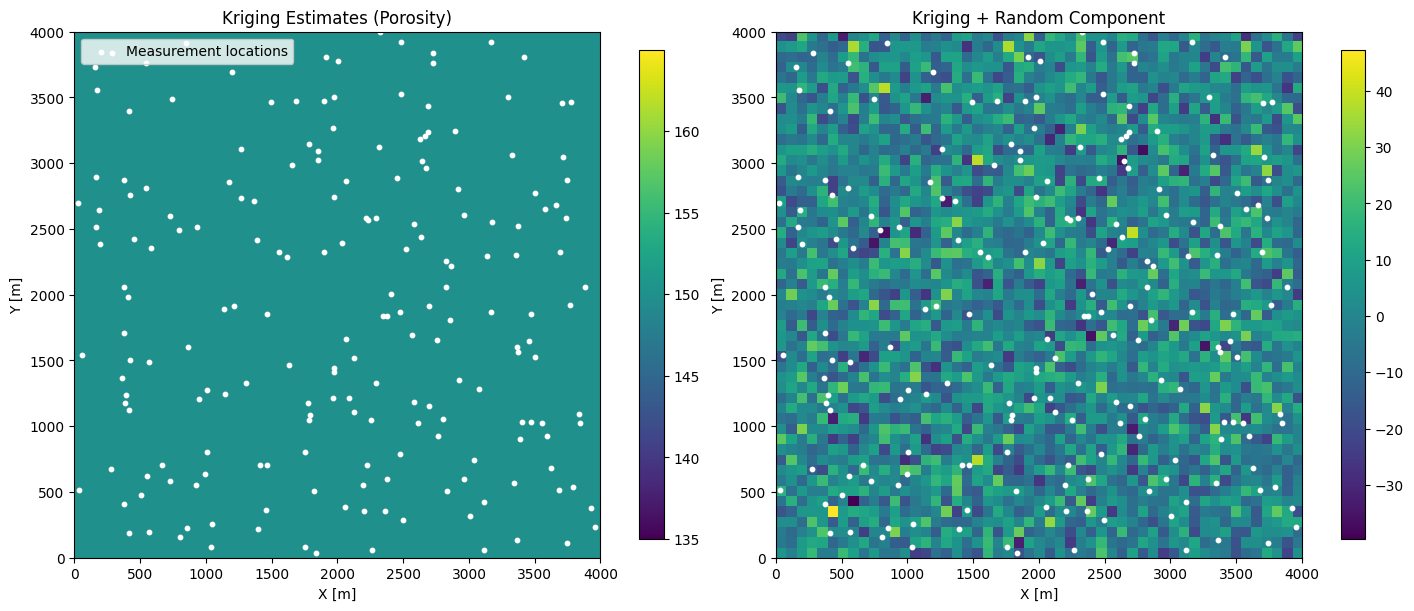

In [ ]:
# YOUR CODE HERE
def add_missing_variance(kriged_mean, kriged_var, seed=None):
    """
    Add random component based on kriging variance.

    Parameters:
    - kriged_mean: array of kriging estimates (mean)
    - kriged_var: array of kriging variances
    - seed: optional, for reproducibility

    Returns:
    - simulated_values: array of values with missing variance added
    """
    if seed is not None:
        np.random.seed(seed)
    
    simulated_values = np.random.normal(loc=kriged_mean, scale=np.sqrt(kriged_var))
    return simulated_values

# --- Apply to the kriged porosity ---
kriged_with_variance = add_missing_variance(kriged_porosity, kriging_variance, seed=42)

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Original kriging estimate
im0 = axs[0].imshow(kriging_variance_map, origin='lower', cmap='viridis', extent=[0, 4000, 0, 4000])
axs[0].scatter(data['X'], data['Y'], color='white', s=10, label='Measurement locations')
axs[0].set_title('Kriging Estimates (Porosity)')
axs[0].set_xlabel('X [m]')
axs[0].set_ylabel('Y [m]')
axs[0].legend()
fig.colorbar(im0, ax=axs[0], fraction=0.046, pad=0.04)

# Kriging with added variance
im1 = axs[1].imshow(kriged_with_variance.reshape(kriging_variance_map.shape), 
                    origin='lower', cmap='viridis', extent=[0, 4000, 0, 4000])
axs[1].scatter(data['X'], data['Y'], color='white', s=10)
axs[1].set_title('Kriging + Random Component')
axs[1].set_xlabel('X [m]')
axs[1].set_ylabel('Y [m]')
fig.colorbar(im1, ax=axs[1], fraction=0.046, pad=0.04)

plt.show()


# Kriging vs Conditional Simulation

## Comparison Table

| Feature | Kriging (Left) | Simulation (Right) |
|---------|---------------|-------------------|
| **Type** | Deterministic | Stochastic |
| **Output** | Single map | Multiple realizations |
| **Appearance** | Smooth, uniform | Rough, heterogeneous |
| **Variance** | Too low ❌ | Correct ✅ |
| **Use for** | Best estimate | Uncertainty analysis |

---

## Kriging (Left Plot)

**What it is:** Smooth interpolation - weighted average of nearby points

**Pros:**
- Best estimate at each location
- Easy to interpret
- Good for resource estimation

**Cons:**
- Over-smoothed (unrealistically uniform)
- Underestimates spatial variability
- Not suitable for flow simulation

---

## Conditional Simulation (Right Plot)

**What it is:** Adds realistic variability while honoring data points

**Pros:**
- Preserves spatial variance
- Realistic heterogeneity
- Multiple scenarios for uncertainty

**Cons:**
- Stochastic (different each run)
- Need many realizations
- Harder to interpret single map

---
## When to Use What

**Kriging:** Resource estimation, mapping, reporting  
**Simulation:** Uncertainty, flow modeling, risk assessment

**Best practice:** Use both! Kriging for best estimate, simulation for uncertainty.